In [76]:
import pandas as pd
import numpy as np
import os

df1 = pd.read_csv('googleplaystore.csv') 
df1




,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [77]:
# dane = df1.iloc[: , :9] 
dane = df1[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].groupby(['App', 'Category', 'Rating', 'Size', 'Installs', 'Type', 'Content Rating']).mean().reset_index()
dane


,App,Category,Rating,Size,Installs,Type,Content Rating,Reviews
0,+Download 4 Instagram Twitter,SOCIAL,4.5,22M,"1,000,000+",Free,Everyone,40467.0
1,- Free Comics - Comic Apps,COMICS,3.5,9.1M,"10,000+",Free,Mature 17+,115.0
2,.R,TOOLS,4.5,203k,"10,000+",Free,Everyone,259.0
3,/u/app,COMMUNICATION,4.7,53M,"10,000+",Free,Mature 17+,573.0
4,058.ba,NEWS_AND_MAGAZINES,4.4,14M,100+,Free,Everyone,27.0
...,...,...,...,...,...,...,...,...
8288,감성학원 BL 첫사랑,COMICS,4.4,34M,"10,000+",Free,Everyone,190.0
8289,💎 I'm rich,LIFESTYLE,3.8,26M,"10,000+",Paid,Everyone,718.0
8290,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,18M,"1,000,000+",Free,Everyone,22098.0
8291,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,3.2M,"10,000+",Free,Everyone,19.0


In [78]:
#sprawdzanie czy sa duble

dane.isna().max()


App               False
Category          False
Rating            False
Size              False
Installs          False
Type              False
Content Rating    False
Reviews           False
dtype: bool

Text(0.5, 0, 'Rating')

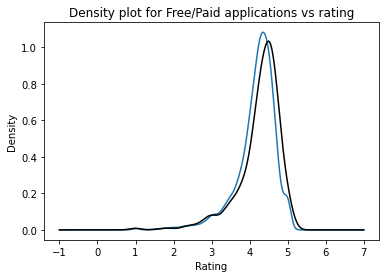

In [79]:
data_type = dane[['App', 'Type', 'Rating', 'Installs', 'Reviews']]
avg_rt =data_type.groupby(by='Type').mean()['Rating']
avg_rt
free_type =data_type[data_type['Type']== 'Free']
paid_type =data_type[data_type['Type']== 'Paid']

import matplotlib.pyplot as plt


free_type['Rating'].plot.density()
paid_type['Rating'].plot.density(color = 'k')
plt.title('Density plot for Free/Paid applications vs rating')
plt.xlabel('Rating')



In [80]:
#obliczenia outliners dla Reviews 
data_type.groupby(by='Type').describe()['Reviews']
q1 =data_type.quantile(0.25)['Reviews']
q3 =data_type.quantile(0.75)['Reviews']
iqr = q3 - q1
lower_bound = (q1 - 1.5*iqr)
upper_bound = (q3 + 1.5*iqr)
print(iqr, lower_bound, upper_bound)

num_of_outliers_L = (data_type['Reviews']< lower_bound).sum()
num_of_outliers_U = (data_type['Reviews']> upper_bound).sum()

print(num_of_outliers_L, num_of_outliers_U)


65013.0 -97386.5 162665.5
0 1527


Text(0.5, 0, 'Reviews')

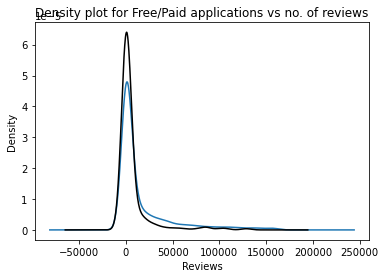

In [81]:
#wybranie danych nie będacymi outlines
sorted_data= data_type[(data_type['Reviews'] < upper_bound) & (data_type['Reviews'] > lower_bound)]

free_type_s =sorted_data[sorted_data['Type']== 'Free']
paid_type_s =sorted_data[sorted_data['Type']== 'Paid']

import matplotlib.pyplot as plt
import seaborn as sns


free_type_s['Reviews'].plot.density()
paid_type_s['Reviews'].plot.density(color = 'k')
plt.title('Density plot for Free/Paid applications vs no. of reviews')
plt.xlabel('Reviews')


In [82]:
#statystyka po usunięciu outlines
sorted_data.groupby(by='Type').describe()['Reviews']

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,6183.0,16344.144913,31453.377132,1.0,81.0,1291.0,16068.0,162655.0
Paid,583.0,6389.041166,18371.457228,1.0,30.0,217.0,2522.0,129603.0


In [83]:
#sprawdzanie outlines - inna metoda - sigma (to ma zastosowanie tylko do rozkładów normlanych, najprawdopodobniej nie jest aplikowalne)
sigma = data_type['Reviews'].std()
srednia = data_type['Reviews'].mean()

low_boundary = (srednia - 3*sigma)
upp_boundary = (srednia + 3*sigma)

numb_of_otliers_L = (data_type['Reviews'] < low_boundary).sum()
numb_of_otliers_U = (data_type['Reviews'] > upp_boundary).sum()

print(numb_of_otliers_L, numb_of_otliers_U)

0 3


<AxesSubplot:ylabel='Density'>

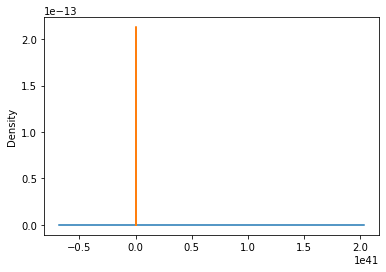

In [84]:
sorted_data_sigma= data_type[(data_type['Reviews'] < upp_boundary) & (data_type['Reviews'] > low_boundary)]

free_type_ss =sorted_data_sigma[sorted_data_sigma['Type']== 'Free']
paid_type_ss =sorted_data_sigma[sorted_data_sigma['Type']== 'Paid']

import matplotlib.pyplot as plt
import seaborn as sns


free_type_ss['Reviews'].plot.density()
paid_type_ss['Reviews'].plot.density()

#wykres nie jest czytelny - tylko 3 outlines, metodyka nie ma znaczenia/zastosowania?

In [85]:
#zamiana str na int - Installs

data_type['Installs'] = data_type['Installs'].str.rstrip('+')
data_type['Installs'] = data_type['Installs'].replace(',', '', regex = True)
data_type
data_type['Installs'] = pd.to_numeric(data_type['Installs'])



C:\Users\andrz\AppData\Local\Temp/ipykernel_22512/390395051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_type['Installs'] = data_type['Installs'].str.rstrip('+')
C:\Users\andrz\AppData\Local\Temp/ipykernel_22512/390395051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_type['Installs'] = data_type['Installs'].replace(',', '', regex = True)
C:\Users\andrz\AppData\Local\Temp/ipykernel_22512/390395051.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [86]:
#obliczenia outliners dla Installs 
data_type.groupby(by='Type').describe()['Installs']
q1_i =data_type.quantile(0.25)['Installs']
q3_i =data_type.quantile(0.75)['Installs']
iqr_i = q3_i - q1_i
lower_bound_i = (q1_i - 1.5*iqr_i)
upper_bound_i = (q3_i + 1.5*iqr_i)
print(iqr_i, lower_bound_i, upper_bound_i)

num_of_outliers_L_i = (data_type['Installs']< lower_bound_i).sum()
num_of_outliers_U_i = (data_type['Installs']> upper_bound_i).sum()

print(num_of_outliers_L_i, num_of_outliers_U_i)
data_type.groupby(by='Type').describe()['Installs']

#pytanie czy outlines jest dobrze policzone? wychodzi 2050 outlines w górnym pułapie... bez tych obliczń wykres jest nieczytelny jednak...

990000.0 -1475000.0 2485000.0
0 2050


,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,7687.0,1.040538e+07,6.205632e+07,1.0,10000.0,500000.0,5000000.0,1.000000e+09
Paid,606.0,9.546614e+04,6.008403e+05,1.0,1000.0,5000.0,50000.0,1.000000e+07


<AxesSubplot:ylabel='Density'>

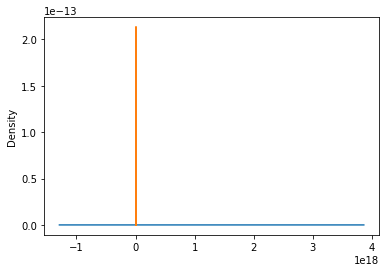

In [87]:
#wybranie danych nie będace outlines - wykres nieczytelny...

sorted_data_i= data_type[(data_type['Installs'] < upper_bound_i) & (data_type['Installs'] > lower_bound_i)]

free_type_si =sorted_data_i[sorted_data_i['Type']== 'Free']
paid_type_si =sorted_data_i[sorted_data_i['Type']== 'Paid']


free_type_si['Reviews'].plot.density()
paid_type_si['Reviews'].plot.density()

<AxesSubplot:ylabel='Density'>

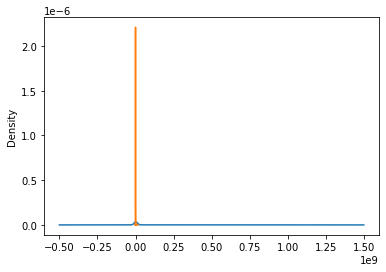

In [88]:
#bez usuwania outlines dla Installs

free_type =data_type[data_type['Type']== 'Free']
paid_type =data_type[data_type['Type']== 'Paid']

import matplotlib.pyplot as plt
import seaborn as sns


free_type['Installs'].plot.density()
paid_type['Installs'].plot.density()


App  Rating  Reviews
Installs   Type                       
1          Free     1       1        1
           Paid     2       2        2
5          Free     9       9        9
10         Free    51      51       51
           Paid    18      18       18
50         Free    42      42       42
           Paid    14      14       14
100        Free   237     237      237
           Paid    66      66       66
500        Free   163     163      163
           Paid    36      36       36
1000       Free   566     566      566
           Paid   132     132      132
5000       Free   360     360      360
           Paid    65      65       65
10000      Free   871     871      871
           Paid   117     117      117
50000      Free   417     417      417
           Paid    40      40       40
100000     Free  1016    1016     1016
           Paid    82      82       82
500000     Free   497     497      497
           Paid    12      12       12
1000000    Free  1409    1409     1409
           Paid    20      20       20
5000000    Free   621     621      621
10000000   Free   964     964      964
           Paid     2       2        2
50000000   Free   211     211      211
100000000  Free   204     204      204
500000000  Free    27      27       27
1000000000 Free    21      21       21

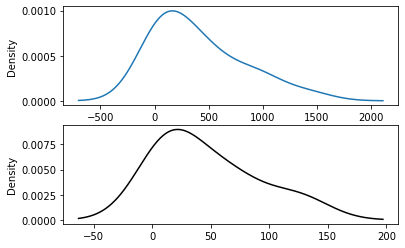

In [89]:
#przebieg dla Installs - zestawinie w 'klasie' ilości pobrań i sprawdzenie częstotliwości 'klasy' - bardziej informacyjnie niż do użycia
data_type.groupby(['Installs', 'Type']).count()


free_instal =data_type[data_type['Type']== 'Free'].groupby('Installs').count()['App']
paid_instal =data_type[data_type['Type']== 'Paid'].groupby('Installs').count()['App']


plt.subplot(2,1,1)
free_instal.plot.density()
plt.subplot(2,1,2)
paid_instal.plot.density(color = 'k')
data_type.groupby(['Installs', 'Type']).count()



count    7.687000e+03
mean     1.040538e+07
std      6.205632e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64
count    6.060000e+02
mean     9.546614e+04
std      6.008403e+05
min      1.000000e+00
25%      1.000000e+03
50%      5.000000e+03
75%      5.000000e+04
max      1.000000e+07
Name: Installs, dtype: float64


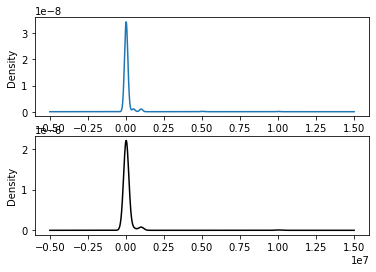

In [90]:
#przebieg dla 'Installs' bez usuwania outlines - na dwóch różnych wykresach

plt.subplot(2,1,1)
free_type['Installs'].plot.density()
plt.subplot(2,1,2)
paid_type['Installs'].plot.density(color = 'k')

print(free_type['Installs'].describe())
print(paid_type['Installs'].describe())

<AxesSubplot:>

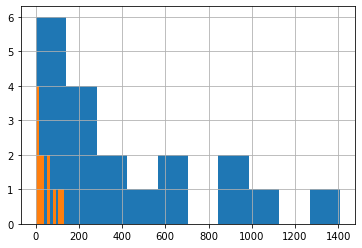

In [91]:
#histogram dla Installs tylko po to zeby porównać dokładniej powyższe przebiegi

free_instal.hist()
paid_instal.hist()

In [92]:
data_type['Installs'].max()

1000000000

In [93]:
max_data= data_type[data_type['Installs'] ==data_type['Installs'].max()] #zestawienie aplikacji o największej liczbie pobrań

max_data_r =max_data[max_data['Reviews']== max_data['Reviews'].max()] #aplikacja najbardziej popularna (rozważanie pod kątem free/paid) // Subway Surfers
max_data_r

max_data_rt =max_data[max_data['Rating']== max_data['Rating'].max()] #aplikacje najbardziej popularne najlepiej ocenianie // Subway Surfers
print(max_data_rt['App'])
print('----------')
print(max_data_r['App'])
max_data_rt

4051     Google Photos
4474         Instagram
6888    Subway Surfers
Name: App, dtype: object
----------
6888    Subway Surfers
Name: App, dtype: object


,App,Type,Rating,Installs,Reviews
4051,Google Photos,Free,4.5,1000000000,2.714639e+30
4474,Instagram,Free,4.5,1000000000,1.664433e+31
6888,Subway Surfers,Free,4.5,1000000000,4.620377e+46


In [94]:


max_data_f= free_type[free_type['Installs'] ==free_type['Installs'].max()]
max_data_f

max_data_p = paid_type[paid_type['Installs']== paid_type['Installs'].max()]
sts_max = max_data_f['Installs'].unique()[0] / max_data_p['Installs'].unique()[0]
sts_max #aplikacja o największej liczny pobrań należąca do kategorii darmowe jest 100 razy bardziej popularna niż aplikacja najczęściej pobierana płatna

100.0

In [95]:
#suma pobrań aplikacji płatnej / darmowej względem ilości takich aplikacji

sum_free = data_type[data_type['Type']== 'Free']['Installs'].sum()
no_free = len(data_type[data_type['Type']== 'Free'])
sum_paid = data_type[data_type['Type']== 'Paid']['Installs'].sum()
no_paid = len(data_type[data_type['Type']== 'Paid'])

wsp_free = round(sum_free/no_free, 2)
wsp_paid = round(sum_paid/no_paid, 2)
print(f'Stosunek ilości pobrań do ilości aplikacji w bazie dla aplikacji damrowych wynosi :{wsp_free}, natomiast dla płatnych: {wsp_paid}')

Stosunek ilości pobrań do ilości aplikacji w bazie dla aplikacji damrowych wynosi :10405377.11, natomiast dla płatnych: 95466.14


In [96]:
sum_free_r = data_type[data_type['Type']== 'Free']['Reviews'].sum()
no_free = len(data_type[data_type['Type']== 'Free'])
sum_paid_r = data_type[data_type['Type']== 'Paid']['Reviews'].sum()
no_paid = len(data_type[data_type['Type']== 'Paid'])

wsp_free_r = round(sum_free_r/no_free, 2)
wsp_paid_r = round(sum_paid_r/no_paid, 2)
print(f'Stosunek ilości recenzji do ilości aplikacji w bazie dla aplikacji damrowych wynosi :{wsp_free_r}, natomiast dla płatnych: {wsp_paid_r}')

Stosunek ilości recenzji do ilości aplikacji w bazie dla aplikacji damrowych wynosi :1.395159028010926e+43, natomiast dla płatnych: 292545255005.72


In [97]:
avg_free = data_type[data_type['Type']== 'Free']['Rating'].mean()
avg_paid = data_type[data_type['Type']== 'Paid']['Rating'].mean()


print(f'Średnia ocena aplikacji darmowej to : {avg_free}, natomiast płatnej to: {avg_paid}')

Średnia ocena aplikacji darmowej to : 4.168284116040059, natomiast płatnej to: 4.261056105610554


In [98]:
data_type.corr(method='pearson') #badanie korelacji

,Rating,Installs,Reviews
Rating,1.000000,0.042378,0.009994
Installs,0.042378,1.000000,0.190131
Reviews,0.009994,0.190131,1.000000


In [99]:
#statystyka - bez usuniecia outlines

s1 = data_type.groupby(by='Type').describe()['Rating']
s2 = data_type.groupby(by='Type').describe()['Reviews']
s3 = data_type.groupby(by='Type').describe()['Installs']

s1

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,7687.0,4.168284,0.531917,1.0,4.0,4.3,4.5,5.0
Paid,606.0,4.261056,0.559606,1.0,4.1,4.4,4.6,5.0


                                                   App            Category  \
0                        +Download 4 Instagram Twitter              SOCIAL   
1                           - Free Comics - Comic Apps              COMICS   
2                                                   .R               TOOLS   
3                                               /u/app       COMMUNICATION   
4                                               058.ba  NEWS_AND_MAGAZINES   
...                                                ...                 ...   
8288                                       감성학원 BL 첫사랑              COMICS   
8289                                        💎 I'm rich           LIFESTYLE   
8290     💘 WhatsLov: Smileys of love, stickers and GIF              SOCIAL   
8291  📏 Smart Ruler ↔️ cm/inch measuring for homework!               TOOLS   
8292  🔥 Football Wallpapers 4K | Full HD Backgrounds 😍       ENTERTAINMENT   

      Rating  Installs  Reviews  
0        4.5   1000000  40467

C:\Users\andrz\AppData\Local\Temp/ipykernel_22512/1573607859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_category['Installs'] = data_category['Installs'].str.rstrip('+')
C:\Users\andrz\AppData\Local\Temp/ipykernel_22512/1573607859.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_category['Installs'] = data_category['Installs'].replace(',', '', regex = True)
C:\Users\andrz\AppData\Local\Temp/ipykernel_22512/1573607859.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy o

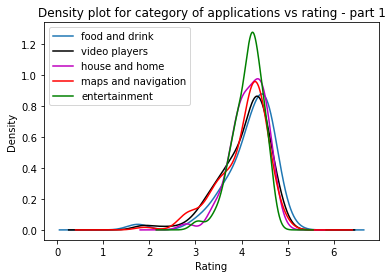

In [100]:
data_category= dane[['App', 'Category', 'Rating', 'Installs', 'Reviews']]



data_category['Installs'] = data_category['Installs'].str.rstrip('+')
data_category['Installs'] = data_category['Installs'].replace(',', '', regex = True)
data_category['Installs'] = pd.to_numeric(data_category['Installs'])

print(data_category)

food_category =data_category[data_category['Category']== 'FOOD_AND_DRINK']
video_category =data_category[data_category['Category']== 'VIDEO_PLAYERS']
home_category =data_category[data_category['Category']== 'HOUSE_AND_HOME']
navigation_category =data_category[data_category['Category']== 'MAPS_AND_NAVIGATION']
entertainment_category =data_category[data_category['Category']== 'ENTERTAINMENT']
finance_category =data_category[data_category['Category']== 'FINANCE'] 
education_category =data_category[data_category['Category']== 'EDUCATION'] 
vehicles_category =data_category[data_category['Category']== 'AUTO_AND_VEHICLES']
weather_category =data_category[data_category['Category']== 'WEATHER']
beauty_category =data_category[data_category['Category']== 'BEAUTY']
events_category =data_category[data_category['Category']== 'EVENTS']
libraries_category =data_category[data_category['Category']== 'LIBRARIES_AND_DEMO']
parenting_category =data_category[data_category['Category']== 'PARENTING']

import matplotlib.pyplot as plt


food_category['Rating'].plot.density(label='food and drink')
video_category['Rating'].plot.density(label= 'video players', color = 'k')
home_category['Rating'].plot.density(label= 'house and home', color = 'm')
navigation_category['Rating'].plot.density(label= 'maps and navigation', color = 'r')
entertainment_category['Rating'].plot.density(label= 'entertainment', color = 'g')
plt.title('Density plot for category of applications vs rating - part 1')
plt.xlabel('Rating')
plt.legend()





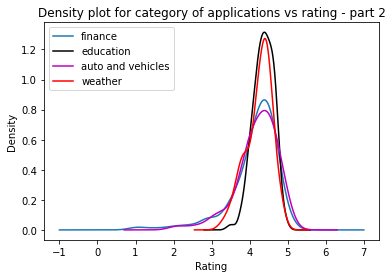

In [101]:
finance_category['Rating'].plot.density(label='finance')
education_category['Rating'].plot.density(label= 'education', color = 'k')
vehicles_category['Rating'].plot.density(label= 'auto and vehicles', color = 'm')
weather_category['Rating'].plot.density(label= 'weather', color = 'r')
plt.title('Density plot for category of applications vs rating - part 2')
plt.xlabel('Rating')
plt.legend()

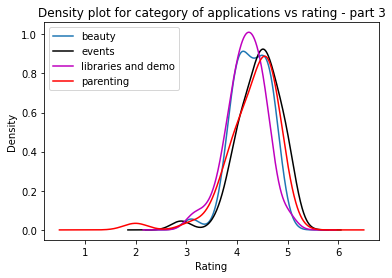

In [102]:
beauty_category['Rating'].plot.density(label='beauty')
events_category['Rating'].plot.density(label= 'events', color = 'k')
libraries_category['Rating'].plot.density(label= 'libraries and demo', color = 'm')
parenting_category['Rating'].plot.density(label= 'parenting', color = 'r')
plt.title('Density plot for category of applications vs rating - part 3')
plt.xlabel('Rating')
plt.legend()

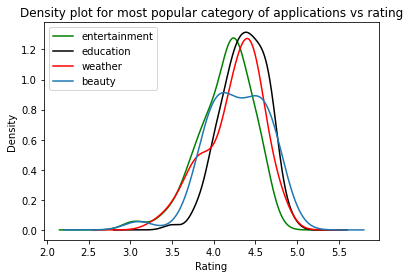

In [103]:
#na podstawie 3 poprzednich wykresów tylko top-y

entertainment_category['Rating'].plot.density(label= 'entertainment', color = 'g')
education_category['Rating'].plot.density(label= 'education', color = 'k')
weather_category['Rating'].plot.density(label= 'weather', color = 'r')
beauty_category['Rating'].plot.density(label='beauty')
plt.title('Density plot for most popular category of applications vs rating')
plt.xlabel('Rating')
plt.legend()


65013.0 -97386.5 162665.5
0 1527


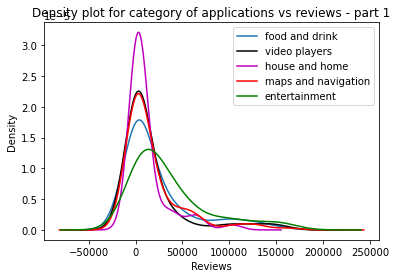

In [104]:
#obliczenia outliners dla Reviews 
q1 =data_category.quantile(0.25)['Reviews']
q3 =data_category.quantile(0.75)['Reviews']
iqr = q3 - q1
lower_bound = (q1 - 1.5*iqr)
upper_bound = (q3 + 1.5*iqr)
print(iqr, lower_bound, upper_bound)

num_of_outliers_L = (data_category['Reviews']< lower_bound).sum()
num_of_outliers_U = (data_category['Reviews']> upper_bound).sum()

print(num_of_outliers_L, num_of_outliers_U)

#wybranie danych nie będacymi outlines
sorted_data_c= data_category[(data_category['Reviews'] < upper_bound) & (data_category['Reviews'] > lower_bound)]

food_category_s =sorted_data_c[sorted_data_c['Category']== 'FOOD_AND_DRINK']
video_category_s =sorted_data_c[sorted_data_c['Category']== 'VIDEO_PLAYERS']
home_category_s =sorted_data_c[sorted_data_c['Category']== 'HOUSE_AND_HOME']
navigation_category_c =sorted_data_c[sorted_data_c['Category']== 'MAPS_AND_NAVIGATION']
entertainment_category_c =sorted_data_c[sorted_data_c['Category']== 'ENTERTAINMENT']
finance_category_c =sorted_data_c[sorted_data_c['Category']== 'FINANCE'] 
education_category_c =sorted_data_c[sorted_data_c['Category']== 'EDUCATION'] 
vehicles_category_c =sorted_data_c[sorted_data_c['Category']== 'AUTO_AND_VEHICLES']
weather_category_c =sorted_data_c[sorted_data_c['Category']== 'WEATHER']
beauty_category_c =sorted_data_c[sorted_data_c['Category']== 'BEAUTY']
events_category_c =sorted_data_c[sorted_data_c['Category']== 'EVENTS']
libraries_category_c =sorted_data_c[sorted_data_c['Category']== 'LIBRARIES_AND_DEMO']
parenting_category_c =sorted_data_c[sorted_data_c['Category']== 'PARENTING']

import matplotlib.pyplot as plt
import seaborn as sns


food_category_s['Reviews'].plot.density(label='food and drink')
video_category_s['Reviews'].plot.density(label= 'video players', color = 'k')
home_category_s['Reviews'].plot.density(label= 'house and home', color = 'm')
navigation_category_c['Reviews'].plot.density(label= 'maps and navigation', color = 'r')
entertainment_category_c['Reviews'].plot.density(label= 'entertainment', color = 'g')
plt.title('Density plot for category of applications vs reviews - part 1')
plt.xlabel('Reviews')
plt.legend()



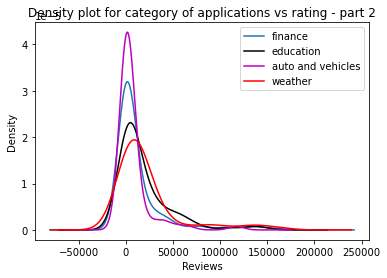

In [105]:
finance_category_c['Reviews'].plot.density(label='finance')
education_category_c['Reviews'].plot.density(label= 'education', color = 'k')
vehicles_category_c['Reviews'].plot.density(label= 'auto and vehicles', color = 'm')
weather_category_c['Reviews'].plot.density(label= 'weather', color = 'r')
plt.title('Density plot for category of applications vs rating - part 2')
plt.xlabel('Reviews')
plt.legend()

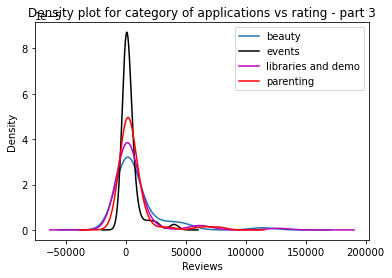

In [106]:
beauty_category_c['Reviews'].plot.density(label='beauty')
events_category_c['Reviews'].plot.density(label= 'events', color = 'k')
libraries_category_c['Reviews'].plot.density(label= 'libraries and demo', color = 'm')
parenting_category_c['Reviews'].plot.density(label= 'parenting', color = 'r')
plt.title('Density plot for category of applications vs rating - part 3')
plt.xlabel('Reviews')
plt.legend()

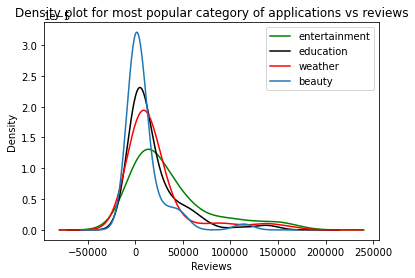

In [107]:
#na podstawie 3 poprzednich wykresów tylko top-y

entertainment_category_c['Reviews'].plot.density(label= 'entertainment', color = 'g')
education_category_c['Reviews'].plot.density(label= 'education', color = 'k')
weather_category_c['Reviews'].plot.density(label= 'weather', color = 'r')
beauty_category_c['Reviews'].plot.density(label='beauty')
plt.title('Density plot for most popular category of applications vs reviews')
plt.xlabel('Reviews')
plt.legend()

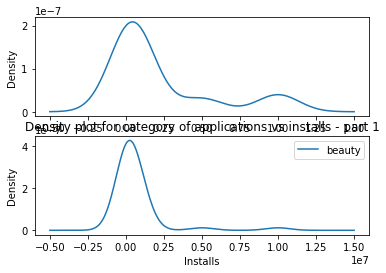

In [113]:
plt.subplot(2,1,1)
food_category['Installs'].plot.density(label='food and drink')
plt.subplot(2,1,2)
# video_category['Installs'].plot.density(label= 'video players', color = 'k')
# home_category['Installs'].plot.density(label= 'house and home', color = 'm')
# navigation_category['Installs'].plot.density(label= 'maps and navigation', color = 'r')
# entertainment_category['Installs'].plot.density(label= 'entertainment', color = 'g')
# finance_category['Installs'].plot.density(label='finance')
# education_category['Installs'].plot.density(label= 'education', color = 'k')
# vehicles_category['Installs'].plot.density(label= 'auto and vehicles', color = 'm') # ew. do rozważania
# weather_category['Installs'].plot.density(label= 'weather', color = 'r') #do rozważania
beauty_category['Installs'].plot.density(label='beauty')
# events_category['Installs'].plot.density(label= 'events', color = 'k')
# libraries_category['Installs'].plot.density(label= 'libraries and demo', color = 'm')
# parenting_category['Installs'].plot.density(label= 'parenting', color = 'r')
plt.title('Density plot for category of applications vs installs - part 1')
plt.xlabel('Installs')
plt.legend()

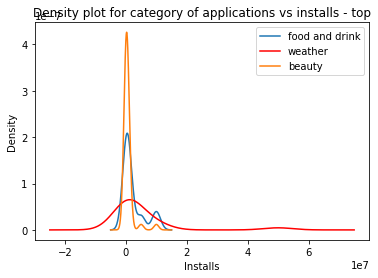

In [114]:
food_category['Installs'].plot.density(label='food and drink')
weather_category['Installs'].plot.density(label= 'weather', color = 'r')
beauty_category['Installs'].plot.density(label='beauty')
# entertainment_category['Installs'].plot.density(label= 'entertainment', color = 'g') - aplikacje rozrywkowe istnieją zawsze, jest ich więcej co nie znaczy że są populanriejsze
plt.title('Density plot for category of applications vs installs - top')
plt.xlabel('Installs')
plt.legend()

In [110]:

entertainment_category= data_category[data_category['Category']== 'ENTERTAINMENT']
entertainment_category_max_rt = entertainment_category[entertainment_category['Rating']== entertainment_category['Rating'].max()]

entertainment_category_max_rv = entertainment_category[entertainment_category['Reviews']== entertainment_category['Reviews'].max()]
entertainment_category_max_rv

entertainment_category_max_in = entertainment_category[entertainment_category['Installs']== entertainment_category['Installs'].max()]
entertainment_category_max_in

print(entertainment_category_max_rt)
print('-----')
print(entertainment_category_max_rv)
print('-----')
print(entertainment_category_max_in)



                                                   App       Category  Rating  \
8292  🔥 Football Wallpapers 4K | Full HD Backgrounds 😍  ENTERTAINMENT     4.7   

      Installs  Reviews  
8292   1000000  11661.0  
-----
          App       Category  Rating   Installs       Reviews
5515  Netflix  ENTERTAINMENT     4.4  100000000  1.364052e+27
-----
                    App       Category  Rating    Installs    Reviews
4053  Google Play Games  ENTERTAINMENT     4.3  1000000000  7165362.0


In [111]:
education_category= data_category[data_category['Category']== 'EDUCATION']
education_category_max_rt = education_category[education_category['Rating']== education_category['Rating'].max()]

education_category_max_rv = education_category[education_category['Reviews']== education_category['Reviews'].max()]
education_category_max_rv

education_category_max_in = education_category[education_category['Installs']== education_category['Installs'].max()]
education_category_max_in


print(education_category_max_rt)
print('-----')
print(education_category_max_rv)
print('-----')
print(education_category_max_in)

                                                 App   Category  Rating  \
4784  Learn Japanese, Korean, Chinese Offline & Free  EDUCATION     4.9   
6483                             Sago Mini Hat Maker  EDUCATION     4.9   

      Installs   Reviews  
4784   1000000  133136.0  
6483      1000      11.0  
-----
                                 App   Category  Rating   Installs  \
2893  Duolingo: Learn Languages Free  EDUCATION     4.7  100000000   

           Reviews  
2893  1.572481e+27  
-----
                                 App   Category  Rating   Installs  \
2893  Duolingo: Learn Languages Free  EDUCATION     4.7  100000000   

           Reviews  
2893  1.572481e+27  


In [112]:
dane[dane['App']== 'Subway Surfers']



,App,Category,Rating,Size,Installs,Type,Content Rating,Reviews
6888,Subway Surfers,GAME,4.5,76M,"1,000,000,000+",Free,Everyone 10+,4.620377e+46
